# <i>"중고차 가격 예측"을 위한 전처리</i>

## 목차
1. 라이브러리 & 데이터 업로드
2. 데이터 둘러보기
3. 결측치 처리
4. 이상치 처리
5. 중복 데이터 처리
6. 형태 변환 <br>
  6-1. 컬럼명 변경 <br>
  6-2. Engin, Emission Class 컬럼 타입을 숫자 형태로 변환 <br>
  6-3. cars.csv와 brand.csv의 데이터 합치기 <br>
7. 합친 dataset 살펴보기 <br>
  7-1. 등록 연도별 중고차 평균 가격 <br>
  7-2. 현대차 등록 연도별 중고차 평균 가격 <br>
  7-3. 국가별 총 브랜드 수 <br>
  7-4. 상관관계 <br>
8. 불필요한 컬럼 삭제 및 One-hot Encoding
9. Scaler
10. PCA

## 1. 라이브러리 & 데이터 업로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car_df = pd.read_csv('cars.csv')
brand_df = pd.read_csv('brand.csv')

## 2. 데이터 둘러보기

In [3]:
car_df.shape

(3687, 13)

In [4]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [5]:
car_df.tail()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full
3686,VAUXHALL CORSA,2000,82160,2013,7.0,Petrol,Hatchback,1.2L,Manual,5.0,5.0,Euro 5,NaN


In [6]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 374.6+ KB


In [7]:
car_df.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
count,3687.000000,3.687000e+03,3687.000000,2276.000000,3662.000000,3652.000000
mean,5787.301058,8.132854e+04,2011.846216,2.807557,4.321409,4.900329
std,4480.629885,3.941718e+04,5.082387,1.546028,0.986760,0.577046
min,400.000000,1.000000e+00,1953.000000,1.000000,2.000000,2.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,3.000000,5.000000
50%,4000.000000,8.000000e+04,2012.000000,3.000000,5.000000,5.000000
75%,7995.000000,1.030000e+05,2015.500000,4.000000,5.000000,5.000000
max,33900.000000,1.110100e+06,2025.000000,9.000000,5.000000,7.000000


In [8]:
brand_df.shape

(48, 2)

In [9]:
brand_df.head()

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


In [10]:
brand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    48 non-null     object
 1   country  48 non-null     object
dtypes: object(2)
memory usage: 896.0+ bytes


## 2. 결측치 처리

- Previous Owner: 가격 예측에 큰 영향 없어 컬럼 삭제
- Engine: 가격 예측에 중요한 변수, 대체하는 것 보다 결측치 비율 1.2%로 낮아 결측치 삭제
- Doors: 가격 예측에 미미한 변수, 중앙값으로 대체
- Seats: 가격 예측에 미미한 변수, 중앙값으로 대체
- Emission Class: 가격 예측에 중요한 변수, 대체하는 것 보다 결측치 비율 2.3%로 낮아 결측치 삭제
- Service history 컬럼의 결측치를 unknown로 대체

In [11]:
car_df.isna().sum()

title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1411
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3147
dtype: int64

In [12]:
car_df.isna().mean()

title                0.000000
Price                0.000000
Mileage(miles)       0.000000
Registration_Year    0.000000
Previous Owners      0.382696
Fuel type            0.000000
Body type            0.000000
Engine               0.012205
Gearbox              0.000000
Doors                0.006781
Seats                0.009493
Emission Class       0.023596
Service history      0.853539
dtype: float64

In [13]:
car_df['Previous Owners'].value_counts()

2.0    594
1.0    523
3.0    475
4.0    360
5.0    208
6.0     60
7.0     39
8.0     12
9.0      5
Name: Previous Owners, dtype: int64

In [14]:
car_df[car_df['Previous Owners'].isna()]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN
6,FORD FOCUS,798,140599,2008,NaN,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN
7,VAUXHALL CORSA,1995,90000,2009,NaN,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,NaN
8,VOLVO 740,750,225318,2025,NaN,Petrol,Estate,2.3L,Automatic,5.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677,ROVER 800,3975,34000,1995,NaN,Petrol,Saloon,2.7L,Automatic,4.0,NaN,NaN,NaN
3680,CITROEN C3,1795,85962,2009,NaN,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 4,NaN
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN


In [15]:
# Previous Owner는 자동차 가격 예측에 큰 영향을 미치지 않아 삭제
car_df.drop('Previous Owners', axis=1, inplace=True)

In [16]:
car_df['Engine'].value_counts().head(10)

1.6L    736
2.0L    553
1.2L    521
1.4L    421
1.0L    326
1.5L    294
1.3L    170
1.8L    158
3.0L     79
2.2L     75
Name: Engine, dtype: int64

In [17]:
# 엔진은 중고차 가격에 큰 영향을 미치며, 결측치 비율이 1.2%로 낮아 삭제
car_df.dropna(subset=['Engine'], inplace=True)

In [18]:
car_df['Doors'].value_counts()

5.0    2310
3.0     734
4.0     367
2.0     216
Name: Doors, dtype: int64

In [19]:
car_df['Doors'].median()

5.0

In [20]:
# Doors 컬럼의 NaN을 median 값으로 대체
car_df['Doors'] = car_df['Doors'].fillna(car_df['Doors'].median())

In [21]:
car_df['Seats'].value_counts()

5.0    2936
4.0     529
7.0     121
2.0      25
6.0       4
3.0       2
Name: Seats, dtype: int64

In [22]:
car_df['Seats'].median()

5.0

In [23]:
# Seats 컬럼의 NaN을 median 값으로 대체
car_df['Seats'] = car_df['Seats'].fillna(car_df['Seats'].median())

In [24]:
car_df['Emission Class'].value_counts()

Euro 5    1256
Euro 6    1109
Euro 4    1068
Euro 3     137
Euro 2      25
Euro 1       4
Name: Emission Class, dtype: int64

In [25]:
car_df[car_df['Emission Class'].isna()].head()

,title,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
8,VOLVO 740,750,225318,2025,Petrol,Estate,2.3L,Automatic,5.0,5.0,NaN,NaN
95,RENAULT FLUENCE,2490,67104,2010,Diesel,Saloon,1.5L,Manual,4.0,5.0,NaN,NaN
163,HONDA ODYSSEY,2449,88240,2012,Petrol,MPV,2.4L,Automatic,5.0,7.0,NaN,NaN
178,MERCEDES-BENZ CLK,3995,70000,2009,Petrol,Coupe,2.0L,Automatic,2.0,5.0,NaN,NaN
229,MERCEDES-BENZ 260,2995,57400,1991,Petrol,Saloon,2.6L,Automatic,4.0,5.0,NaN,NaN


In [26]:
# 배기가스 기준은 중고차 가격의 중요 요소
# 결측치가 2.3%로 상대적으로 낮은 비율이므로 대체값 사용하지 않고 삭제
car_df.dropna(subset=['Emission Class'], inplace=True)

In [27]:
car_df['Service history'].value_counts()

Full    534
Name: Service history, dtype: int64

In [28]:
# Service history 컬럼의 결측치를 unknown로 대체
car_df['Service history'] = car_df['Service history'].fillna('unknown')

In [29]:
car_df.isna().any()

title                False
Price                False
Mileage(miles)       False
Registration_Year    False
Fuel type            False
Body type            False
Engine               False
Gearbox              False
Doors                False
Seats                False
Emission Class       False
Service history      False
dtype: bool

## 4. 이상치 처리

- Price: 최고가 차량은 이상치가 아닌 것으로 보임
- Millage: 최대값은 이상치로 삭제
- Registration_Year: 최대값은 이상치이지만, 결측치 처리에서 이미 삭제됨

In [30]:
car_df.describe()

,Price,Mileage(miles),Registration_Year,Doors,Seats
count,3599.000000,3.599000e+03,3599.000000,3599.000000,3599.000000
mean,5789.254515,8.152794e+04,2011.930258,4.316755,4.898861
std,4512.333738,3.956275e+04,4.778109,0.988103,0.574902
min,400.000000,1.000000e+00,1992.000000,2.000000,2.000000
25%,2490.000000,5.698400e+04,2008.000000,3.000000,5.000000
50%,3999.000000,8.000000e+04,2012.000000,5.000000,5.000000
75%,7999.000000,1.032000e+05,2016.000000,5.000000,5.000000
max,33900.000000,1.110100e+06,2023.000000,5.000000,7.000000


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

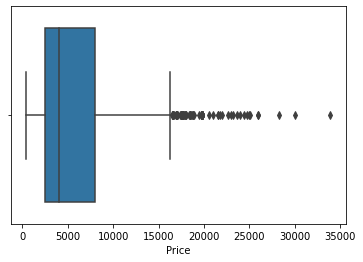

In [31]:
sns.boxplot(car_df['Price'])

In [32]:
car_df[car_df['Price'] > 7999]

,title,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
13,BMW 3 SERIES,19800,69690,2019,Petrol Plug-in Hybrid,Saloon,2.0L,Automatic,4.0,5.0,Euro 6,unknown
22,MERCEDES-BENZ A180,14498,53055,2019,Petrol,Hatchback,1.3L,Manual,5.0,5.0,Euro 6,unknown
26,MERCEDES-BENZ A CLASS,15900,62402,2019,Petrol,Hatchback,1.3L,Automatic,5.0,5.0,Euro 6,unknown
27,FORD FOCUS,8975,86500,2017,Diesel,Hatchback,1.5L,Manual,5.0,5.0,Euro 6,unknown
39,MERCEDES-BENZ A CLASS,15900,62402,2019,Petrol,Hatchback,1.3L,Automatic,5.0,5.0,Euro 6,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
3590,VAUXHALL ZAFIRA TOURER,13399,42847,2017,Diesel,MPV,2.0L,Manual,5.0,7.0,Euro 6,unknown
3600,VAUXHALL ZAFIRA TOURER,13399,42847,2017,Diesel,MPV,2.0L,Manual,5.0,7.0,Euro 6,unknown
3637,SUZUKI SWIFT,10707,11589,2020,Petrol Hybrid,Hatchback,1.2L,Manual,5.0,5.0,Euro 6,unknown
3650,MINI HATCH,11999,33156,2018,Petrol,Hatchback,1.5L,Manual,5.0,5.0,Euro 6,Full


In [33]:
car_df[car_df['Price'] == car_df['Price'].max()]

,title,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
3212,MERCEDES-BENZ GLE CLASS,33900,92000,2019,Diesel,SUV,2.0L,Automatic,5.0,5.0,Euro 6,unknown


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mileage(miles)'>

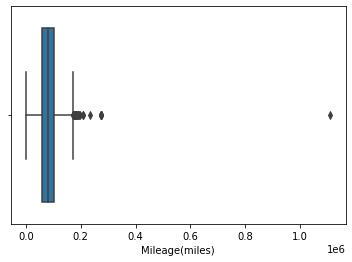

In [34]:
sns.boxplot(car_df['Mileage(miles)'])

In [35]:
car_df[car_df['Mileage(miles)'] == car_df['Mileage(miles)'].max()]

,title,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
1037,VOLKSWAGEN BEETLE,2495,1110100,2003,Petrol,Hatchback,2.0L,Automatic,3.0,4.0,Euro 4,unknown


In [36]:
# Millage의 max 값 삭제
car_df.drop(1037, axis=0, inplace=True)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Registration_Year'>

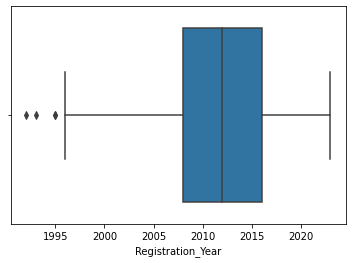

In [37]:
sns.boxplot(car_df['Registration_Year'])

In [38]:
car_df['Registration_Year'].value_counts()

2011    286
2010    269
2012    263
2014    256
2009    249
2016    245
2007    242
2013    241
2008    225
2019    211
2015    205
2017    162
2006    149
2020    105
2005    104
2018     95
2021     83
2004     72
2003     51
2002     30
2001     22
2022      8
1999      5
2023      5
2000      4
1998      3
1997      3
1995      2
1992      1
1996      1
1993      1
Name: Registration_Year, dtype: int64

## 5. 중복 데이터 처리

In [39]:
car_df[car_df.duplicated()]

,title,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
12,SKODA FABIA,6900,70189,2016,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,unknown
20,CITROEN C4,1949,114000,2013,Diesel,Hatchback,1.6L,Manual,5.0,5.0,Euro 5,unknown
25,VAUXHALL INSIGNIA,2950,79000,2011,Petrol,Hatchback,1.8L,Manual,5.0,5.0,Euro 5,unknown
39,MERCEDES-BENZ A CLASS,15900,62402,2019,Petrol,Hatchback,1.3L,Automatic,5.0,5.0,Euro 6,unknown
52,VAUXHALL CORSA,10698,22782,2020,Petrol,Hatchback,1.2L,Manual,5.0,5.0,Euro 6,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
3662,MINI HATCH,11999,33156,2018,Petrol,Hatchback,1.5L,Manual,5.0,5.0,Euro 6,Full
3663,VAUXHALL ASTRA,4999,60139,2015,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 6,unknown
3674,MITSUBISHI OUTLANDER,1489,145000,2007,Diesel,SUV,2.0L,Manual,5.0,7.0,Euro 4,unknown
3675,VAUXHALL ASTRA,4999,60139,2015,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 6,unknown


In [40]:
car_df[(car_df['title'] == "SKODA FABIA") & (car_df['Price'] == 6900)]

,title,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,unknown
12,SKODA FABIA,6900,70189,2016,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,unknown
391,SKODA FABIA,6900,70189,2016,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,unknown
402,SKODA FABIA,6900,70189,2016,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,unknown
571,SKODA FABIA,6900,70189,2016,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,unknown
624,SKODA FABIA,6900,70189,2016,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,unknown
675,SKODA FABIA,6900,70189,2016,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,unknown
676,SKODA FABIA,6900,70189,2016,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,unknown
688,SKODA FABIA,6900,70189,2016,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,unknown
689,SKODA FABIA,6900,70189,2016,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,unknown


In [41]:
car_df = car_df.drop_duplicates()

In [42]:
car_df.shape

(2798, 12)

## 6. 형태 변환

- 6-1. 컬럼명 변경
- 6-2. Engin, Emission Class 컬럼 타입을 숫자 형태로 변환
- 6-3. cars.csv와 brand.csv의 데이터 합치기

### 6-1. 컬럼명 변경

In [43]:
car_df.rename({'title': 'Title', 'Mileage(miles)': 'Mileage', 'Fuel type':'Fuel_type', 'Body type':'Body_type', 'Emission Class':'Emission_class', 'Service history':'Service_history'}, axis=1, inplace=True)

### 6-2. Engin, Emission Class 컬럼 타입을 숫자 형태로 변환

In [44]:
car_df.head()

,Title,Price,Mileage,Registration_Year,Fuel_type,Body_type,Engine,Gearbox,Doors,Seats,Emission_class,Service_history
0,SKODA FABIA,6900,70189,2016,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,unknown
1,VAUXHALL CORSA,1495,88585,2008,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,unknown
3,MINI HATCH,2395,96731,2010,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,unknown


In [45]:
car_df['Engine'] = car_df['Engine'].str[:-1].astype('float')

In [46]:
car_df['Emission_class'] = car_df['Emission_class'].str[5:].astype('int')

In [47]:
car_df.head()

,Title,Price,Mileage,Registration_Year,Fuel_type,Body_type,Engine,Gearbox,Doors,Seats,Emission_class,Service_history
0,SKODA FABIA,6900,70189,2016,Diesel,Hatchback,1.4,Manual,5.0,5.0,6,unknown
1,VAUXHALL CORSA,1495,88585,2008,Petrol,Hatchback,1.2,Manual,3.0,5.0,4,Full
2,HYUNDAI I30,949,137000,2011,Petrol,Hatchback,1.4,Manual,5.0,5.0,5,unknown
3,MINI HATCH,2395,96731,2010,Petrol,Hatchback,1.4,Manual,3.0,4.0,4,Full
4,VAUXHALL CORSA,1000,85000,2013,Diesel,Hatchback,1.3,Manual,5.0,5.0,5,unknown


In [48]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2798 entries, 0 to 3686
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              2798 non-null   object 
 1   Price              2798 non-null   int64  
 2   Mileage            2798 non-null   int64  
 3   Registration_Year  2798 non-null   int64  
 4   Fuel_type          2798 non-null   object 
 5   Body_type          2798 non-null   object 
 6   Engine             2798 non-null   float64
 7   Gearbox            2798 non-null   object 
 8   Doors              2798 non-null   float64
 9   Seats              2798 non-null   float64
 10  Emission_class     2798 non-null   int64  
 11  Service_history    2798 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 284.2+ KB


### 6-3. cars.csv와 brand.csv의 데이터 합치기

In [49]:
brand_df.rename({'title':'Title', 'country':'Country'}, axis=1, inplace=True)

In [50]:
brand_df.head()

,Title,Country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


In [51]:
brand_df['Title'].unique()

array(['skoda', 'vauxhall', 'hyundai', 'mini', 'ford', 'volvo', 'peugeot',
       'bmw', 'citroen', 'mercedes-benz', 'mazda', 'saab', 'volkswagen',
       'honda', 'mg', 'toyota', 'seat', 'nissan', 'alfa', 'renault',
       'kia', 'proton', 'fiat', 'audi', 'mitsubishi', 'lexus', 'land',
       'chevrolet', 'suzuki', 'dacia', 'daihatsu', 'jeep', 'jaguar',
       'chrysler', 'rover', 'ds', 'daewoo', 'dodge', 'porsche', 'subaru',
       'infiniti', 'abarth', 'smart', 'marcos', 'maserati', 'ssangyong',
       'lagonda', 'isuzu'], dtype=object)

In [52]:
car_df['Title'].unique()

array(['SKODA FABIA', 'VAUXHALL CORSA', 'HYUNDAI I30', 'MINI HATCH',
       'HYUNDAI COUPE', 'FORD FOCUS', 'PEUGEOT 207', 'FORD FIESTA',
       'VAUXHALL INSIGNIA', 'BMW 3 SERIES', 'CITROEN C1', 'CITROEN C4',
       'VAUXHALL ASTRA', 'FORD MONDEO', 'MERCEDES-BENZ A180',
       'PEUGEOT 407', 'FORD KA', 'MERCEDES-BENZ A CLASS', 'MAZDA MAZDA2',
       'SAAB 9-3', 'VOLKSWAGEN POLO', 'BMW 1 SERIES', 'HONDA ACCORD',
       'VOLKSWAGEN BEETLE', 'MG MG6', 'FORD C-MAX', 'HONDA CIVIC',
       'TOYOTA AURIS', 'VOLVO S40', 'SEAT IBIZA', 'PEUGEOT 308',
       'VAUXHALL MERIVA', 'MERCEDES-BENZ B CLASS', 'MAZDA MAZDA3',
       'NISSAN 350 Z', 'ALFA ROMEO MITO', 'VOLKSWAGEN PASSAT',
       'KIA SPORTAGE', 'CITROEN XM', 'VAUXHALL ANTARA', 'NISSAN NOTE',
       'BMW 5 SERIES', 'HONDA CR-V', 'PROTON SAVVY', 'NISSAN MICRA',
       'FIAT PANDA', 'RENAULT MEGANE', 'RENAULT CLIO', 'HYUNDAI I20',
       'CITROEN C3', 'AUDI A6 SALOON', 'TOYOTA YARIS', 'FIAT 500',
       'MERCEDES-BENZ M CLASS', 'AUDI A4', 'PE

In [53]:
car_df['Title_split'] = car_df['Title'].str.split(expand=True)[0].str.lower()

In [54]:
car_df.head()

,Title,Price,Mileage,Registration_Year,Fuel_type,Body_type,Engine,Gearbox,Doors,Seats,Emission_class,Service_history,Title_split
0,SKODA FABIA,6900,70189,2016,Diesel,Hatchback,1.4,Manual,5.0,5.0,6,unknown,skoda
1,VAUXHALL CORSA,1495,88585,2008,Petrol,Hatchback,1.2,Manual,3.0,5.0,4,Full,vauxhall
2,HYUNDAI I30,949,137000,2011,Petrol,Hatchback,1.4,Manual,5.0,5.0,5,unknown,hyundai
3,MINI HATCH,2395,96731,2010,Petrol,Hatchback,1.4,Manual,3.0,4.0,4,Full,mini
4,VAUXHALL CORSA,1000,85000,2013,Diesel,Hatchback,1.3,Manual,5.0,5.0,5,unknown,vauxhall


In [55]:
car_merged_df = car_df.merge(brand_df, how='left', left_on='Title_split', right_on='Title')

In [56]:
car_merged_df.head()

,Title_x,Price,Mileage,Registration_Year,Fuel_type,Body_type,Engine,Gearbox,Doors,Seats,Emission_class,Service_history,Title_split,Title_y,Country
0,SKODA FABIA,6900,70189,2016,Diesel,Hatchback,1.4,Manual,5.0,5.0,6,unknown,skoda,skoda,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,Petrol,Hatchback,1.2,Manual,3.0,5.0,4,Full,vauxhall,vauxhall,United Kingdom
2,HYUNDAI I30,949,137000,2011,Petrol,Hatchback,1.4,Manual,5.0,5.0,5,unknown,hyundai,hyundai,South Korea
3,MINI HATCH,2395,96731,2010,Petrol,Hatchback,1.4,Manual,3.0,4.0,4,Full,mini,mini,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,Diesel,Hatchback,1.3,Manual,5.0,5.0,5,unknown,vauxhall,vauxhall,United Kingdom


In [57]:
car_merged_df.drop(['Title_y'], axis=1, inplace=True)

In [58]:
car_merged_df.rename({'Title_x': 'Title'}, axis=1, inplace=True)

In [59]:
car_merged_df.head()

,Title,Price,Mileage,Registration_Year,Fuel_type,Body_type,Engine,Gearbox,Doors,Seats,Emission_class,Service_history,Title_split,Country
0,SKODA FABIA,6900,70189,2016,Diesel,Hatchback,1.4,Manual,5.0,5.0,6,unknown,skoda,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,Petrol,Hatchback,1.2,Manual,3.0,5.0,4,Full,vauxhall,United Kingdom
2,HYUNDAI I30,949,137000,2011,Petrol,Hatchback,1.4,Manual,5.0,5.0,5,unknown,hyundai,South Korea
3,MINI HATCH,2395,96731,2010,Petrol,Hatchback,1.4,Manual,3.0,4.0,4,Full,mini,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,Diesel,Hatchback,1.3,Manual,5.0,5.0,5,unknown,vauxhall,United Kingdom


## 7. 합친 dataset 살펴보기

### 7-1. 등록 연도별 중고차 평균 가격

In [60]:
car_merged_df.groupby('Registration_Year')['Price'].mean().head()

Registration_Year
1992    5995.000000
1993    2750.000000
1995    3622.500000
1996    1250.000000
1997    2094.666667
Name: Price, dtype: float64

<AxesSubplot:xlabel='Registration_Year', ylabel='Price'>

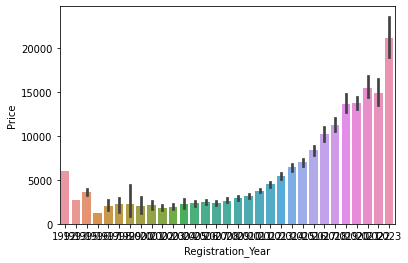

In [61]:
sns.barplot(x=car_merged_df['Registration_Year'], y=car_merged_df['Price'], data=car_merged_df)

### 7-2. 현대차 등록 연도별 중고차 평균 가격

In [62]:
hyundai = car_merged_df[car_merged_df['Title_split'] == 'hyundai']

In [63]:
hyundai.head()

,Title,Price,Mileage,Registration_Year,Fuel_type,Body_type,Engine,Gearbox,Doors,Seats,Emission_class,Service_history,Title_split,Country
2,HYUNDAI I30,949,137000,2011,Petrol,Hatchback,1.4,Manual,5.0,5.0,5,unknown,hyundai,South Korea
5,HYUNDAI COUPE,800,124196,2007,Petrol,Coupe,2.0,Manual,3.0,4.0,4,unknown,hyundai,South Korea
62,HYUNDAI I30,1750,130000,2010,Petrol,Hatchback,1.4,Manual,5.0,5.0,4,unknown,hyundai,South Korea
114,HYUNDAI I20,1500,100600,2010,Petrol,Hatchback,1.2,Manual,5.0,5.0,4,unknown,hyundai,South Korea
122,HYUNDAI I30,1999,105000,2010,Petrol,Hatchback,1.4,Manual,5.0,5.0,4,unknown,hyundai,South Korea


In [64]:
hyundai.groupby('Registration_Year')['Price'].mean()

Registration_Year
2003      990.000000
2005     1495.000000
2006     1738.333333
2007     1458.333333
2008     1998.000000
2009     2174.500000
2010     2636.555556
2011     3115.800000
2012     4394.400000
2013     5045.375000
2014     6070.666667
2015     7275.000000
2016     6416.600000
2017     8611.666667
2018    12307.200000
2019    11180.000000
2021    15337.000000
Name: Price, dtype: float64

<AxesSubplot:xlabel='Registration_Year', ylabel='Price'>

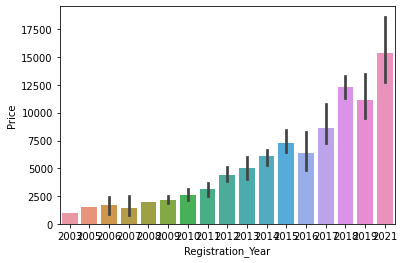

In [65]:
sns.barplot(x=hyundai['Registration_Year'], y=hyundai['Price'], data=hyundai)

### 7-3. 국가별 총 브랜드 수

In [66]:
car_merged_df.groupby('Country')['Title'].nunique()

Country
Czech Republic    11
France            62
Germany           88
Italy             24
Japan             86
Malaysia           2
Romania            5
South Korea       33
Spain              6
Sweden            12
United Kingdom    57
United States     41
Name: Title, dtype: int64

### 7-4. 상관관계

In [67]:
car_merged_corr = car_merged_df.corr()

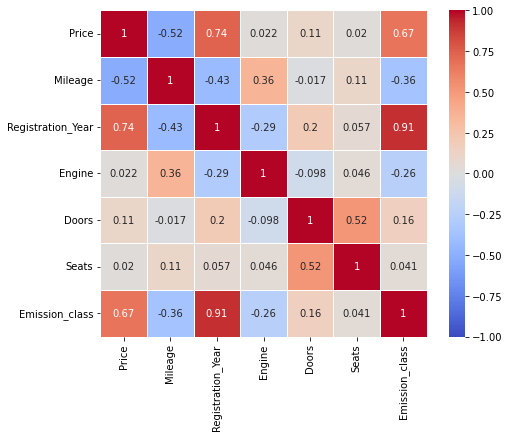

In [68]:
plt.figure(figsize=(8, 6))
sns.heatmap(car_merged_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=.5)
plt.show()

## 8. 불필요한 컬럼 삭제 및 One-hot Encoding

In [69]:
car_merged_df.head()

,Title,Price,Mileage,Registration_Year,Fuel_type,Body_type,Engine,Gearbox,Doors,Seats,Emission_class,Service_history,Title_split,Country
0,SKODA FABIA,6900,70189,2016,Diesel,Hatchback,1.4,Manual,5.0,5.0,6,unknown,skoda,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,Petrol,Hatchback,1.2,Manual,3.0,5.0,4,Full,vauxhall,United Kingdom
2,HYUNDAI I30,949,137000,2011,Petrol,Hatchback,1.4,Manual,5.0,5.0,5,unknown,hyundai,South Korea
3,MINI HATCH,2395,96731,2010,Petrol,Hatchback,1.4,Manual,3.0,4.0,4,Full,mini,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,Diesel,Hatchback,1.3,Manual,5.0,5.0,5,unknown,vauxhall,United Kingdom


In [70]:
car_merged_df.drop(['Title', 'Title_split', 'Country'], axis=1, inplace=True)

In [71]:
car_merged_df.head()

,Price,Mileage,Registration_Year,Fuel_type,Body_type,Engine,Gearbox,Doors,Seats,Emission_class,Service_history
0,6900,70189,2016,Diesel,Hatchback,1.4,Manual,5.0,5.0,6,unknown
1,1495,88585,2008,Petrol,Hatchback,1.2,Manual,3.0,5.0,4,Full
2,949,137000,2011,Petrol,Hatchback,1.4,Manual,5.0,5.0,5,unknown
3,2395,96731,2010,Petrol,Hatchback,1.4,Manual,3.0,4.0,4,Full
4,1000,85000,2013,Diesel,Hatchback,1.3,Manual,5.0,5.0,5,unknown


In [73]:
encoded_df = pd.get_dummies(car_merged_df, columns = ['Fuel_type','Body_type','Gearbox','Service_history'], drop_first = True)

In [74]:
encoded_df.head()

,Price,Mileage,Registration_Year,Engine,Doors,Seats,Emission_class,Fuel_type_Diesel Hybrid,Fuel_type_Petrol,Fuel_type_Petrol Hybrid,...,Body_type_Convertible,Body_type_Coupe,Body_type_Estate,Body_type_Hatchback,Body_type_MPV,Body_type_Pickup,Body_type_SUV,Body_type_Saloon,Gearbox_Manual,Service_history_unknown
0,6900,70189,2016,1.4,5.0,5.0,6,0,0,0,...,0,0,0,1,0,0,0,0,1,1
1,1495,88585,2008,1.2,3.0,5.0,4,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,949,137000,2011,1.4,5.0,5.0,5,0,1,0,...,0,0,0,1,0,0,0,0,1,1
3,2395,96731,2010,1.4,3.0,4.0,4,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,1000,85000,2013,1.3,5.0,5.0,5,0,0,0,...,0,0,0,1,0,0,0,0,1,1


## 9. Scaler
- StandardScaler 적용

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
ss = StandardScaler()

In [77]:
ss.fit(encoded_df)

StandardScaler()

In [78]:
ss_df = pd.DataFrame(ss.transform(encoded_df), columns = encoded_df.columns)

In [79]:
ss_df.head()

,Price,Mileage,Registration_Year,Engine,Doors,Seats,Emission_class,Fuel_type_Diesel Hybrid,Fuel_type_Petrol,Fuel_type_Petrol Hybrid,...,Body_type_Convertible,Body_type_Coupe,Body_type_Estate,Body_type_Hatchback,Body_type_MPV,Body_type_Pickup,Body_type_SUV,Body_type_Saloon,Gearbox_Manual,Service_history_unknown
0,0.380768,-0.391500,1.011026,-0.476290,0.687308,0.188846,1.334047,-0.018908,-1.325387,-0.070914,...,-0.182304,-0.19648,-0.209833,0.819418,-0.219847,-0.032762,-0.397031,-0.344605,0.536303,0.431971
1,-0.926592,0.140557,-0.749989,-0.864085,-1.348782,0.188846,-0.919297,-0.018908,0.754497,-0.070914,...,-0.182304,-0.19648,-0.209833,0.819418,-0.219847,-0.032762,-0.397031,-0.344605,0.536303,-2.314971
2,-1.058659,1.540836,-0.089608,-0.476290,0.687308,0.188846,0.207375,-0.018908,0.754497,-0.070914,...,-0.182304,-0.19648,-0.209833,0.819418,-0.219847,-0.032762,-0.397031,-0.344605,0.536303,0.431971
3,-0.708901,0.376159,-0.309735,-0.476290,-1.348782,-1.521155,-0.919297,-0.018908,0.754497,-0.070914,...,-0.182304,-0.19648,-0.209833,0.819418,-0.219847,-0.032762,-0.397031,-0.344605,0.536303,-2.314971
4,-1.046323,0.036870,0.350645,-0.670188,0.687308,0.188846,0.207375,-0.018908,-1.325387,-0.070914,...,-0.182304,-0.19648,-0.209833,0.819418,-0.219847,-0.032762,-0.397031,-0.344605,0.536303,0.431971


## 10. PCA

In [80]:
from sklearn.decomposition import PCA

In [81]:
pca = PCA(2)
pd.DataFrame(pca.fit_transform(encoded_df), columns=['PC1', 'PC2'])

,PC1,PC2
0,-13608.182201,724.373764
1,5089.896622,-3519.297213
2,53444.233342,-1035.659601
3,13163.644248,-2111.491357
4,1542.881687,-4237.580582
...,...,...
2793,-7262.596513,-4393.712503
2794,35101.594888,3867.531298
2795,55249.776097,2129.484249
2796,95524.020704,2043.638641


In [83]:
pca.explained_variance_ratio_

array([0.98973639, 0.0102636 ])

In [85]:
(pca.explained_variance_ratio_).sum()

0.9999999899295882

# 🐶 회고 

## 1. 요약
- 분석 목적을 명확히 한 후 전처리를 해야 한다
- 결측치 처리에 대한 판단은 아직 부족하다
- 전처리 각 단계별 자주 사용하는 함수와 패턴을 공식화하는 것이 좋겠다
- 다양한 그래프를 전처리 과정에 활용해야 겠다

## 2. 세부 내용
### 2-1. 데이터 둘러 보기
- 분석 목적은 "중고차 가격 예측"으로 정했다
- 주어진 2개의 데이터 셋은 이해하기 어렵지 않았다
- 데이터를 둘러보며, 결측치, 이상치를 다룰 계획을 생각했고, 컬럼들의 관계성을 생각했다
- 데이터 타입과 문자열도 타당한지 살펴보았다

### 2-2. 결측치 처리
- 6개 컬럼에 결측치가 있었으나, 전체 데이터에서 차지하는 비율은 크지 않았다
- 분석 목적인 "중고차 가격 예측"에 큰 영향이 없는 컬럼은 과감히 삭제 했다
- 분석에 작은 영향을 주는 컬럼은 중앙값으로 대체했다
- 분석에 큰 영향을 주는 컬럼은 결측치 비율을 고려하여 삭제 여부를 결정했다
- 큰 영향을 끼치므로 대체값을 사용하는 것은 오히려 분석에 악영향을 줄것으로 생각했다
- 하지만, 결측치 처리에 대한 전략은 여전히 부족하다
- kaggle를 통해 다양한 사례를 학습해야 겠다

### 2-3. 이상치 처리
- Price 컬럼에 이상치로 보이는 상당히 높은 금액이 있었으나, 고급 승용차이고 다른 제반 사항을 고려할때 타당한 가격으로 보였다
- describe()와 boxplot 그래프를 통해 Mileage와 Registration_Year의 이상치를 제거했다
- 이상치를 판단하기 위해 boxplot 이외의 그래프도 활용해야 겠다

### 2-4. 중복 데이터 처리
- duplicated()로 중복을 살펴보았으나, 상당히 많은 데이터가 중복되어 있었다
- 중복된 데이터를 불러와서, 중복 여부를 한번 더 확인했다

### 2-5. 형태 변환
- 컬럼명을 통일성 있게 변경하였다
- Engin, Emission Class 컬럼 타입을 숫자 형태로 변환하였다
- Emission Class에서 Euro만 제거함으로써 숫자 타입으로 변경할 수 있었다 
- cars.csv와 brand.csv의 데이터 합치기 위해 기준이 되는 컬럼의 문자열 형태를 일치시켰다

### 2-6. 합친 dataset 살펴보기
- groupby()를 활용하여 등록 연도별 중고차 평균가격을 살펴보았다
- 특히, 현대차에 대한 등록 연도별 중고차 평균가격도 살펴보았다
- 최근 등록된 차의 가격이 상대적으로 높아, 깊은 상관관계가 보였다
- groupby()를 활용하여 국가별 총 브랜드 수를 살펴보니, 한국이 33개로 적지 않았다
- 상관관계를 살펴보니, 가격은 등록 연도와 배기가스 기준과 높은 상관관계를 보였다
- 이런 상관관계는 PCA 추출할때 참고가 될 것 같다

### 2-7. 불필요한 컬럼 삭제 및 One-hot Encoding
- 머신러닝 분석에 불필요한 컬럼들을 삭제 했다
- Scaling과 PCA 추출을 위해 범주형 데이터를 숫자화하는 One-hot Encoding을 하였다

### 2-8. Scaler
- 거리 기반 알고리즘을 적용한다면 각 컬럼의 단위를 일관성있게 조정하는 Scalling은 필요하다
- StandardScaler, RobustScaler, MinMaxScaler 중에 StandarScaler를 적용했다
- 이상치가 없고, 데이터 분포가 정규분포를 따르고 있는 것처럼 보였기 때문이다.
- 하지만, 정규분포를 따르고 있는지 확인하지 않았고, 이유는 방법을 찾지 못했기 때문이다

### 2-9. PCA
- 2개의 주성분을 추출하였다
- pca.explained_variance_ratio_결과를 보면, array([0.98973639, 0.0102636])로, 첫번째 주성분은 데이터 전체 분산의 약 98.97%를 설명하고 있다
- 대부분의 분산이 첫 번째 주성분에 의해 설명된다는 것을 보여주고 있다
- 반면, 두 번째 주성분은 상대적으로 적은 분산만을 설명하므로, 데이터 구조에서 덜 중요한 정보를 나타내고 있다
- 따라서, 하나의 주성분만 사용해도 될 듯하다